# Setup environment

In [1]:
%pylab
%matplotlib inline

import pandas as pd

# VScode shows plots in matplotlib
plt.show()

Using matplotlib backend: <object object at 0x7fa7306c9b40>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset_url = ('https://raw.githubusercontent.com/m-mehdi/pandas_tutorials/main/weekly_stocks.csv')
# Tell panda this is a Date, use as an index for resampling
df = pd.read_csv(dataset_url, parse_dates=['Date'], index_col='Date')
df.index

DatetimeIndex(['2021-05-24', '2021-05-31', '2021-06-07', '2021-06-14',
               '2021-06-21', '2021-06-28', '2021-07-05', '2021-07-12',
               '2021-07-19', '2021-07-26', '2021-08-02', '2021-08-09',
               '2021-08-16', '2021-08-23', '2021-08-30', '2021-09-06',
               '2021-09-13', '2021-09-20', '2021-09-27', '2021-10-04',
               '2021-10-11', '2021-10-18', '2021-10-25', '2021-11-01',
               '2021-11-08', '2021-11-15', '2021-11-22', '2021-11-29',
               '2021-12-06', '2021-12-13', '2021-12-20', '2021-12-27',
               '2022-01-03', '2022-01-10', '2022-01-17', '2022-01-24',
               '2022-01-31', '2022-02-07', '2022-02-14', '2022-02-21',
               '2022-02-28', '2022-03-07', '2022-03-14', '2022-03-21',
               '2022-03-28', '2022-04-04', '2022-04-11', '2022-04-18',
               '2022-04-25', '2022-05-02', '2022-05-09', '2022-05-16'],
              dtype='datetime64[ns]', name='Date', freq=None)

# Data manipulation

In [3]:
# Resample on the index only? M = month
df_3Months = df.resample(rule='M').mean()[-3:]
df_3Months

,MSFT,FB,AAPL
Date,,,
2022-03-31,298.400002,212.692505,166.934998
2022-04-30,282.087494,204.272499,163.704994
2022-05-31,262.803335,198.643331,147.326665


In [4]:
help(df.resample)

Help on method resample in module pandas.core.frame:

resample(rule, axis=0, closed: 'str | None' = None, label: 'str | None' = None, convention: 'str' = 'start', kind: 'str | None' = None, loffset=None, base: 'int | None' = None, on=None, level=None, origin: 'str | TimestampConvertibleTypes' = 'start_day', offset: 'TimedeltaConvertibleTypes | None' = None) -> 'Resampler' method of pandas.core.frame.DataFrame instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time series.
    The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
    or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
    series/index to the ``on``/``level`` keyword parameter.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing target conversion.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Which axis to use for up- or down-sampli

# Line plots

Default plot type ?

<AxesSubplot:xlabel='Date'>

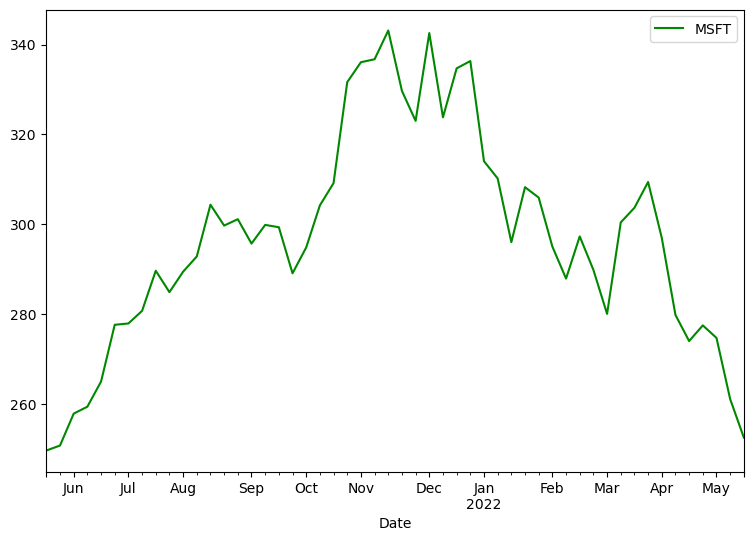

In [5]:
df.plot(y='MSFT', figsize=(9,6), color="#008800")

<AxesSubplot:xlabel='Date'>

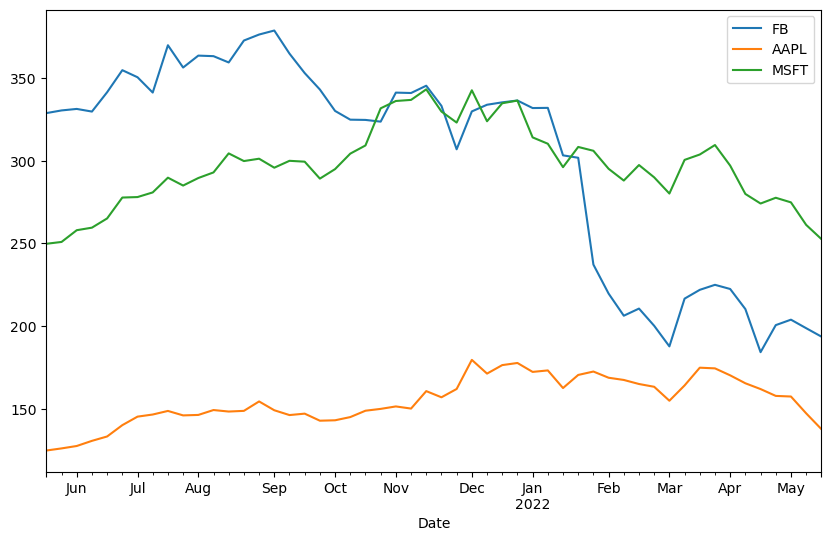

In [6]:
df.plot.line(y=['FB','AAPL','MSFT'], figsize=(10,6))

<AxesSubplot:title={'center':'Facebook stock'}, xlabel='Date', ylabel='USD'>

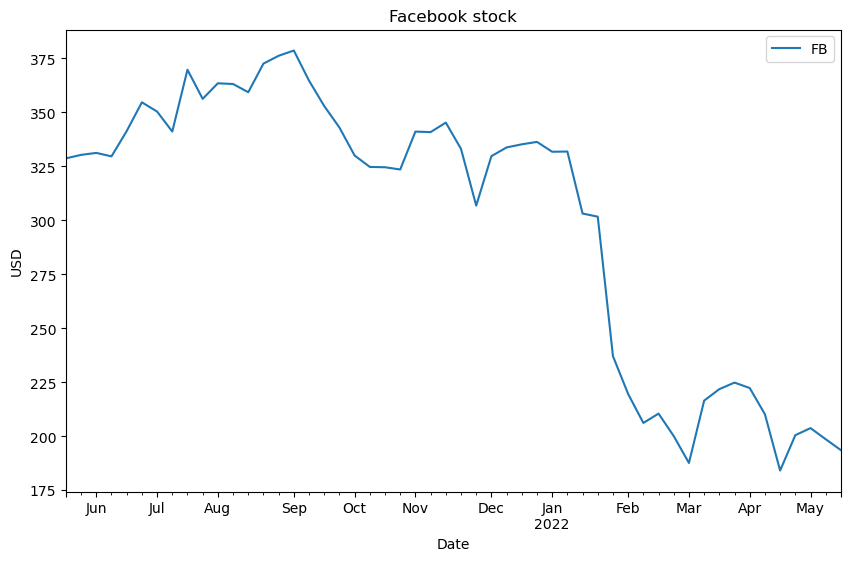

In [7]:
# xlabel is name of the index, e.g."Date"
df.plot(y='FB', figsize=(10,6), title='Facebook stock', ylabel='USD')

In [8]:
# df_3months = df.resample(rule='M').mean()[-3:]
# print(df_3Months)
df_3Months = df.resample(rule='M').mean()[-3:]


## Bar plots

<AxesSubplot:xlabel='Date'>

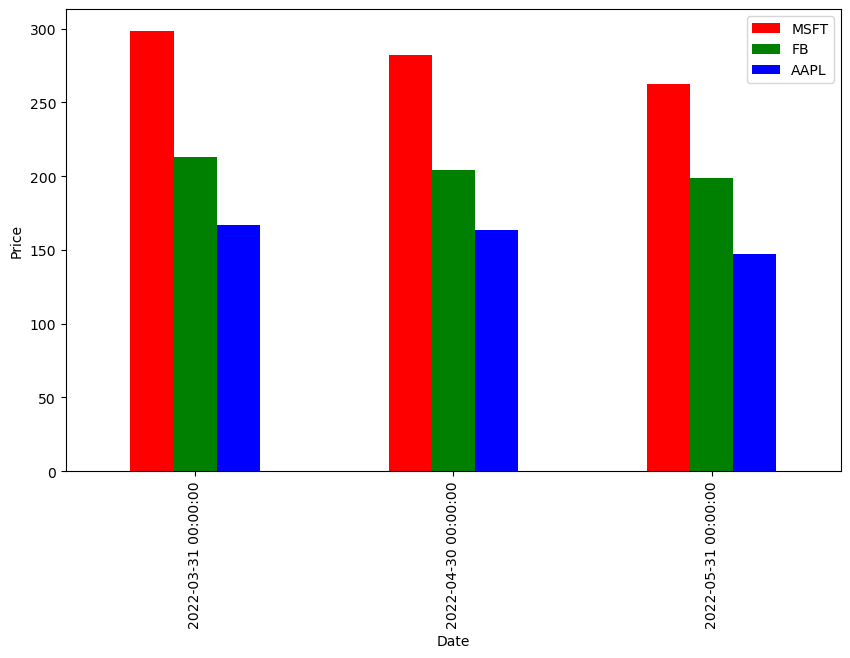

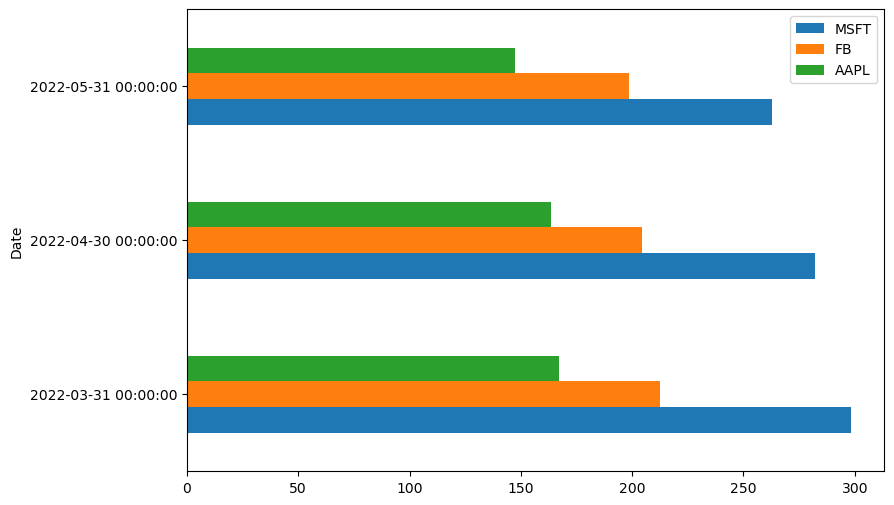

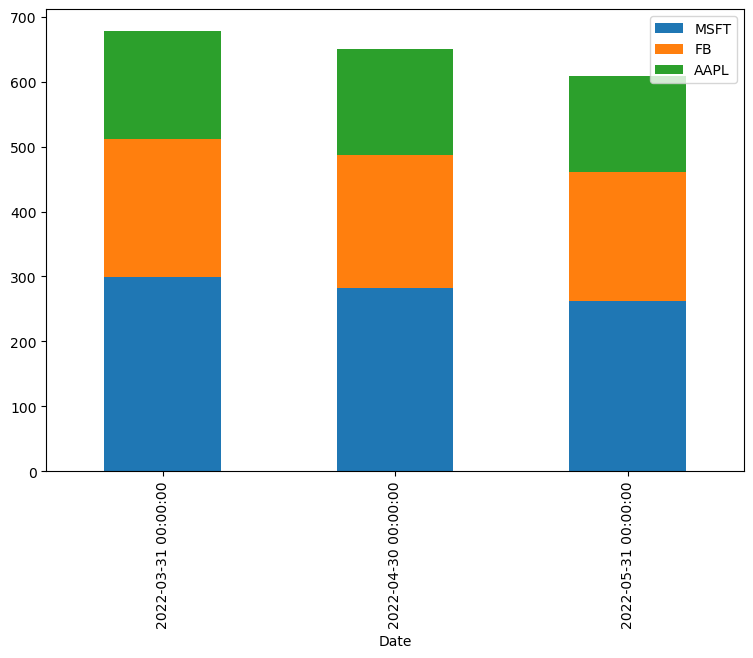

In [9]:
# Vertical bars with a color per column
df_3Months.plot(kind='bar', figsize=(10,6), ylabel='Price', color=["red","green", "blue"])

# horizontal bars
df_3Months.plot(kind='barh', figsize=(9,6))

# Stacked
df_3Months.plot(kind='bar', stacked=True, figsize=(9,6))

# Histograms

Recommended to look at distrubutions

<AxesSubplot:ylabel='Frequency'>

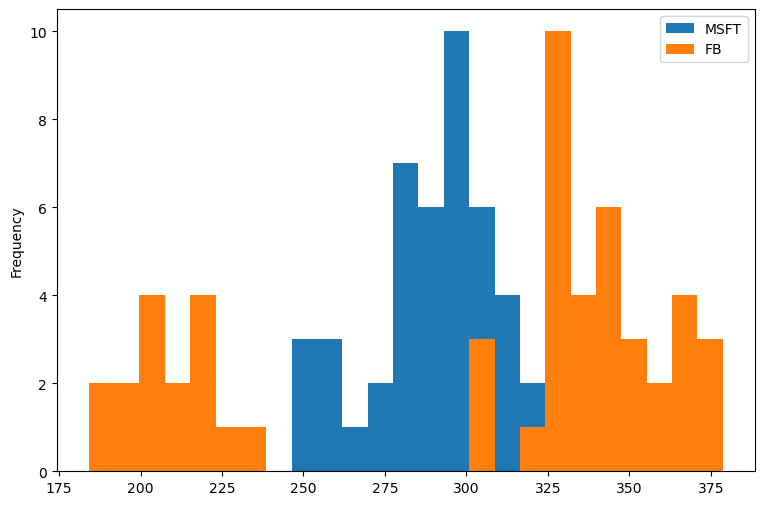

In [10]:
df[['MSFT', 'FB']].plot(kind='hist', bins=25, figsize=(9,6))

# Box plots

Shows
* max
* 75 percentile
* median
* 25 percentile
* min



<AxesSubplot:>

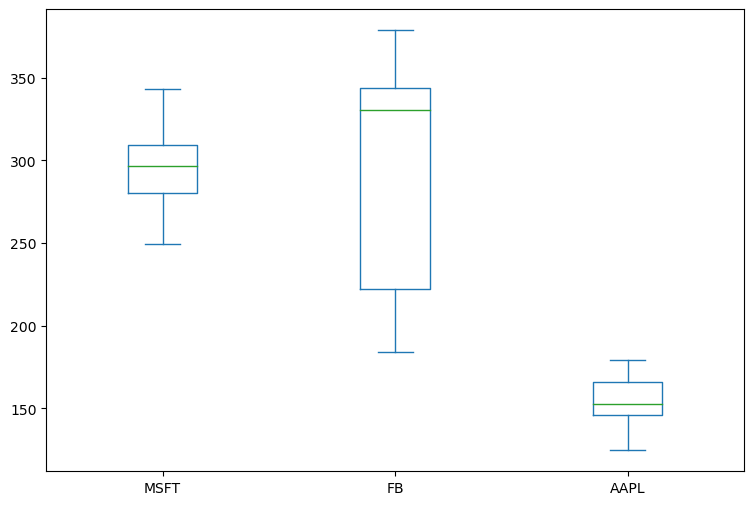

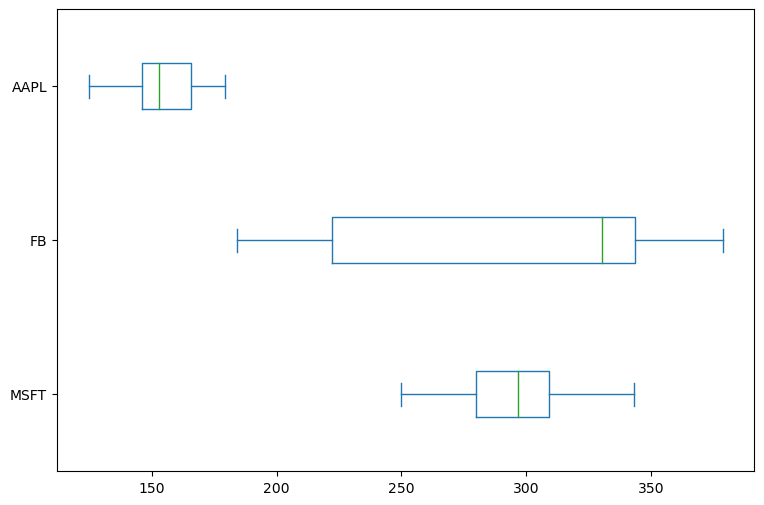

In [11]:
df.plot(kind='box', figsize=(9,6))
df.plot(kind='box', vert=False, figsize=(9,6))

# Area plots

<AxesSubplot:xlabel='Date'>

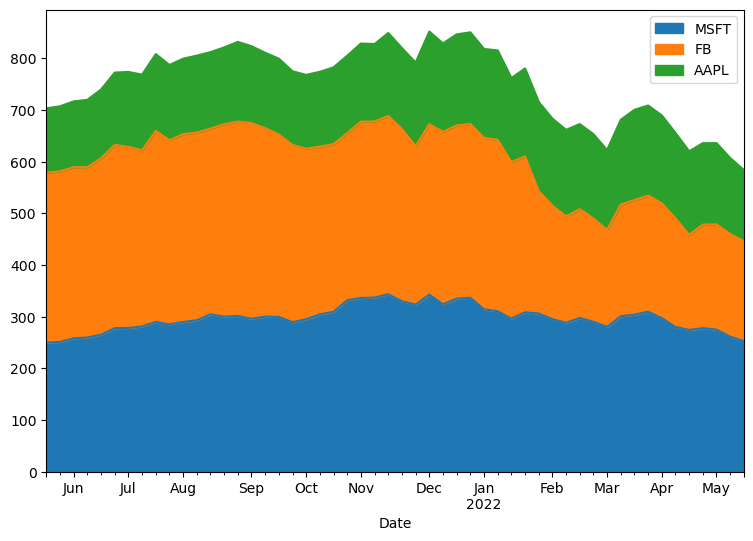

In [12]:
df.plot(kind='area', figsize=(9,6))

# Pie charts

array([<AxesSubplot:ylabel='MSFT'>, <AxesSubplot:ylabel='FB'>,
       <AxesSubplot:ylabel='AAPL'>], dtype=object)

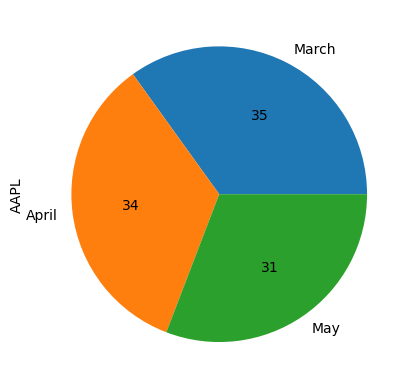

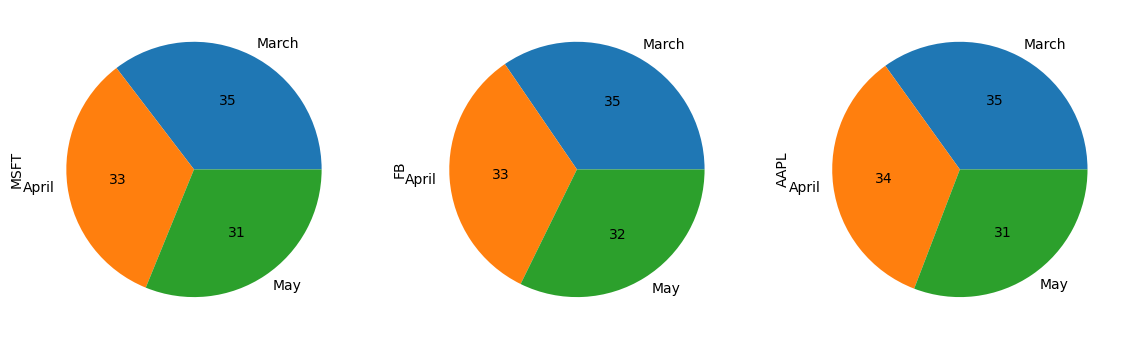

In [13]:
# Set name of wedgies
# Create 1 big pie chart!
df_3Months.index=['March', 'April', 'May']
df_3Months.plot(kind='pie', y='AAPL', legend=False, autopct='%.f')

# Many subplots (pie charts)
df_3Months.plot(kind='pie', legend=False, autopct='%.f', subplots=True, figsize=(14,8))

# Scatter plots

How points are distributed + find relationship between 2 variables (correlation)

<AxesSubplot:xlabel='MSFT', ylabel='AAPL'>

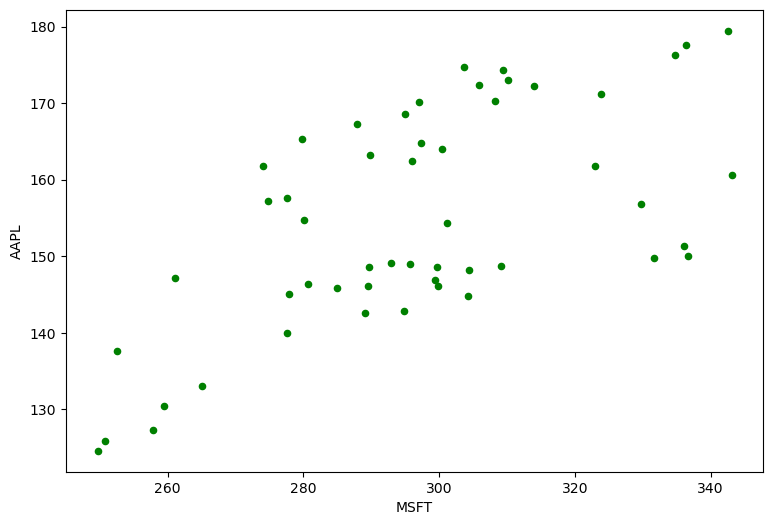

In [14]:
df.plot(kind='scatter', x='MSFT', y='AAPL', figsize=(9,6), color='Green')

# Reformat axis

March <class 'str'>
April <class 'str'>
May <class 'str'>


[Text(0, 0, 'M'), Text(1, 0, 'A'), Text(2, 0, 'M')]

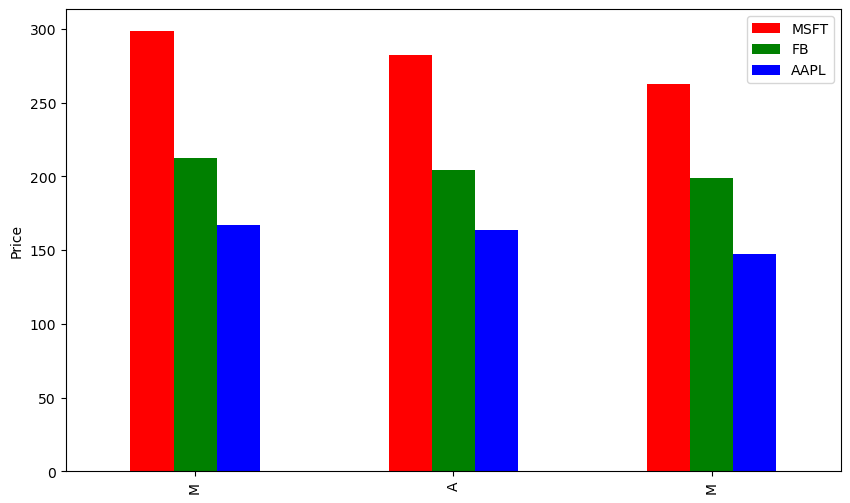

In [24]:
def formatxaxis(label):
    print(label, type(label))
    # result = label.month_name() + " " + str(label.year)
    result = label[0]
    return result

ax = df_3Months.plot(kind='bar', figsize=(10,6), ylabel='Price', color=["red","green", "blue"])
# Change above plot
ax.set_xticklabels(map(formatxaxis, df_3Months.index))

# More at https://stackoverflow.com/questions/11244514/modify-tick-label-text